# COGS 108 - Final Project Group 076

# Overview

For our project we sought out to investigate which factors of a student’s life had significant impacts on their test scores in school. Throughout the project, we looked at variables such as weekday alcohol consumption, parental education levels, travel time to school, family relation quality, study time, and absences. Then after plotting the distribution of these variables, we analyzed the significance of their effect on test score outcomes on the g1, g2, and g3 test using a variety of statistical tests. Finally we looked at the relationships between these outcomes and determined which variables had a significant impact and which ones did not.

# Names

- Alyssa Sangalang Ramiro
- Bryan Truong
- Jacob Chazen
- Ryan Wey
- Trinity Pham

# Research Question

What are the greatest indicators of a student's academic success?

## Background and Prior Work

As students, examining the greatest indicators of student success is interesting to us as a means of broadening our perspective toward our fellow peers. A number of factors can influence the academic performance of students, but it’s not feasible to try and address all of them at the same time. For educational institutions and schools, particularly public schools, it is important to first focus on improving factors which affect the most number of students positively, or are most correlated with educational improvements. To summarize some of the sources we found (mostly from journals/news), family background is highly connected with student academic outcomes. That is, students with more adverse backgrounds (e.g. lower income, lower parental attention, etc) tend to score lower on testing. However, standardized tests cannot accurately determine a student’s success in higher education, so there must be other factors that contribute to the student’s success (1). "The most important indicator of whether or not a student will graduate from college is largely out of his or her control: household income (2)." If we can determine what are teh greatest indicators of a student's success, we can help more students. Other factors that affect a student's succes are a student's "socioeconomic status (SES) and parents' education" which both "have a significant effect on students' overall academic achievement (4)." Furthermore, studies have shown that absences hurt academic performances (5). 

Much of the team feels strongly about this topic and have experience regarding student success as well. As a peer counselor in high school, Jacob often worked with at risk students and learned what factors in and outside the classroom were instrumental to student success and what blockages resulted in students being at risk for failing a subject. Similarly, Ryan was a math tutor at a learning center which worked with, in particular, students who were already struggling in school, and he has similar background with identifying factors that lead to academic success or struggle. In addition, while taking the Dimensions of Culture classes at UCSD, Bryan learned that most students that come from backgrounds/neighborhoods of low income had a great correlation with academic success. This would be due to the nature of the mentality of success in these areas, and academics would usually not be viewed as something important. The schools would also not have the funds to provide resources to the students, such as extracurricular activities, to promote the growth and knowledge of the students. 

 	



References (include links):
- 1) https://phys.org/news/2010-08-standardized-indicator-success.html
- 2) https://www.americaspromise.org/news/pbs-newshour-biggest-predictor-college-success-family-income
- 3) https://globaljournals.org/GJMBR_Volume12/3-Factors-Affecting-Students-Academic.pdf
- 4) https://preview.tinyurl.com/ql88huw
- 5) https://www.epi.org/publication/student-absenteeism-who-misses-school-and-how-missing-school-matters-for-performance/

# Hypothesis


Academic success is tied to: low alcohol consumption, high parent education level, low travel time, high study time and low absences. According to the research papers we looked at, a parent’s education level as well as a lack of absences have a significant effect on a student’s academic achievement. As for alcohol consumption, study time, and travel time, we postulated on these based on our own observations in the real world of these effects.

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name: Student Alcohol Consumption
- Link to the dataset: https://www.kaggle.com/uciml/student-alcohol-consumption
- Number of observations: 395 (mat) 649 (por)

The dataset is gathered from 2 schools in Portugal. It records school, student sex, age, address, family size, parent cohabitation status, Mother's education, father's education, Mother's job, Father's job, reason to choose school (close to home, reputation etc), student's guardian, home to school travel time, study time, failure, extra educational support, family educational support, extra paid classes, extra curricular activities, attended nursery school, pursued higher education, internet access at home, in a romantic relationship, quality of family relationships, freetime after school, how often do they go out with friends, daily alcohol consumption, weekend alcohol consumption, health status, absences, G1 - first periodic grade, G2 - second periodic grade, G3 - final grade.

The datasets for each of the schools contain the same variables and thus can be combined into one dataframe.

# Setup

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats
import patsy
import statsmodels.api as sm
import numpy as np



student_alc_consumption_path = "student-alcohol-consumption/student-mat.csv"
student_alc_consumption_por_path = "student-alcohol-consumption/student-por.csv"
# path = os.path.join(os.getcwd, student_alc_consumption_path)
df = pd.read_csv(student_alc_consumption_path)
df['test_subject'] = 'math'
df_por = pd.read_csv(student_alc_consumption_por_path) # results from a school in portugal
df_por['test_subject'] = 'reading'
0
df_merged = pd.concat([df,df_por])


In [0]:
df_merged.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,test_subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,math


# Data Cleaning

Describe your data cleaning steps here.

In [0]:
# check if there are any rows with null values
rows_with_na = df[df.isnull().any(axis=1)]
print(rows_with_na.empty)

# same as above, with df_por 
rows_with_na_por = df_por[df_por.isnull().any(axis=1)]
print(rows_with_na_por.empty)

# repeat for meged df
rows_with_na_merged = df_merged[df_merged.isnull().any(axis=1)]
print(rows_with_na_merged.empty)


True
True
True


Here we will rename some of our columns to a more readable name.

In [0]:
columns_to_rename = {'Pstatus':'parents living situation', 'Medu':'mother education', 'Fedu': 'father education', 'Mjob': 'mother job', 'Fjob': 'father job', 'traveltime':'commutetime', 'failures': 'classes failed', 'schoolsup': 'school educational support', 'famsup':'family education support', 'activities':'extra curriculars', 'nursery' : 'go to nursery school', 'higher': 'wants higher education', 'internet': 'has internet', 'romantic': 'romantic relationship', 'famrel': 'family relation quality', 'goout':'go out with friends frequency', 'Dalc':'workday alc consumed', 'Walc': 'weekend alc consumed','health': 'how healthy', 'G1': 'g1 score', 'G2': 'g2 score', 'G3': 'g3 score' }
df.rename(columns=columns_to_rename, inplace=True)
df_por.rename(columns=columns_to_rename, inplace=True)
df_merged.rename(columns=columns_to_rename, inplace=True)
df

,school,sex,age,address,famsize,parents living situation,mother education,father education,mother job,father job,reason,guardian,commutetime,studytime,classes failed,school educational support,family education support,paid,extra curriculars,go to nursery school,wants higher education,has internet,romantic relationship,family relation quality,freetime,go out with friends frequency,workday alc consumed,weekend alc consumed,how healthy,absences,g1 score,g2 score,g3 score,test_subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,math
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,math
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,math
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,math


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

First we look at student alcohol consumption

In [0]:
# first we look at student alcohol consumption here are the workday, weekend, and aggregate counts here I will use the merged data
workday_counts = df_merged['workday alc consumed'].value_counts()
weekend_counts = df_merged['weekend alc consumed'].value_counts()
aggregate_counts = workday_counts.add(weekend_counts)


Here are barplots of weekday, weekend, and aggregate counts for reported alcohol consumption. Values range from 1 (very low) to 5 (very high).

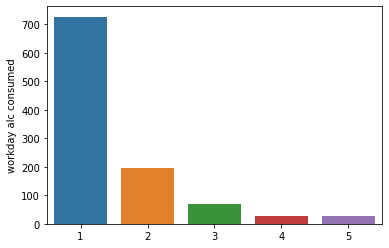

In [0]:
# workday counts
sns.barplot(x=workday_counts.index, y=workday_counts)

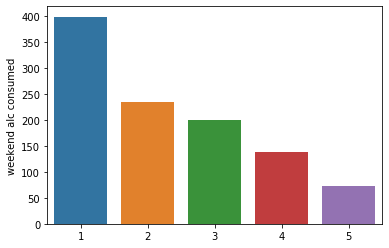

In [0]:
# weekend counts
sns.barplot(x=weekend_counts.index, y=weekend_counts)

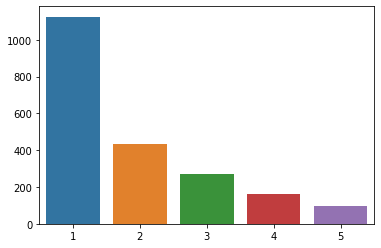

In [0]:
# aggregate counts
sns.barplot(x=aggregate_counts.index, y=aggregate_counts)

Most people are skewed towards very little 

Here is a barplot comparing workday alcohol consumption to score on the standardized test

      workday alc consumed  variable  value
0                        1  g1 score      5
1                        1  g1 score      5
2                        2  g1 score      7
3                        1  g1 score     15
4                        1  g1 score      6
...                    ...       ...    ...
3127                     1  g3 score     10
3128                     1  g3 score     16
3129                     1  g3 score      9
3130                     3  g3 score     10
3131                     3  g3 score     11

[3132 rows x 3 columns]


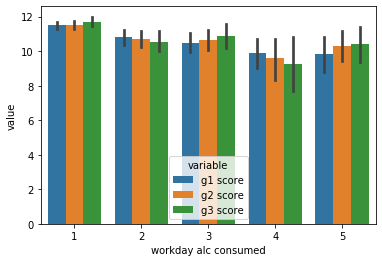

In [0]:
# Use melt function to reorder one variable and test scores as 3 columns with rows for each value
# To use, id_vars should be your desired x-axis variable, value_vars should be the desired y-axis variable(s)
data = df_merged.melt(id_vars = ['workday alc consumed'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
print(data)
# plotting using seaborn barplot function, using 'variable' column from melted DataFrame to create a grouped barplot
sns.barplot(x = 'workday alc consumed', y = 'value', hue = 'variable' , data = data)

In these barplots, their appears to be no strong trend. We proceed to try again by plotting the distribution of test scores with regard to weekday alcohol consumption, focusing on the student's g3 score.

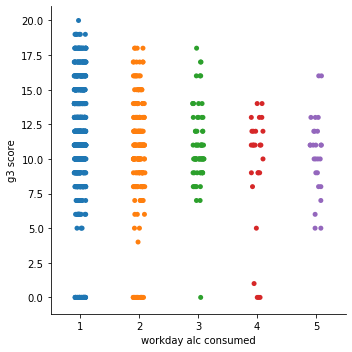

In [0]:
sns.catplot(x='workday alc consumed', y = 'g3 score', data=df_merged)

I will now set out to do a t-test between very low (1) and more alcohol consumption (2-5) focusing on weekday alcohol consumption. My hypothesis are as follows:

H0: The mean g3 test score of students that consume little to no alcohol is less than or equal to that of students that consume more than a little alcohol during weekdays.

H_alt: The mean g3 score of students that consume little to no alcohol is higher than that of students that consume more than a little alcohol during weekdays.

In [0]:
low_alc_g3 = df_merged.loc[df_merged['workday alc consumed'] == 1]['g3 score']
more_alc_g3 = df_merged.loc[df_merged['workday alc consumed'].isin([2,3,4,5])]['g3 score']
z_1, p_1 = stats.normaltest(low_alc_g3)
print(p_1)

z_5, p_5 = stats.normaltest(more_alc_g3)
print(p_5)

if (p_1 and p_5) < 0.05:
  print ("both distributions are approximately normal")

std_low_alc = np.std(low_alc_g3)
std_more_alc = np.std(more_alc_g3)

print("standard deviations are " + str(std_low_alc) + " and " + str(std_more_alc))

1.2050593768638916e-28
2.436595501084314e-12
both distributions are approximately normal
standard deviations are 3.8484739970951853 and 3.7665350938840625


Both distributions are approximately normal and have similar though not equivalent variances so we will not assume equal variances for the t-test below.

In [0]:
# performing t-test

t_stat, p_val = stats.ttest_ind(low_alc_g3, more_alc_g3, equal_var=False)

# since we are performing a one sided t-test
p_val /= 2

print("p value is " + str(p_val))

p value is 1.8549777929542484e-06


Since the p value is less than the alpha level 0.05. There is evidence to say the mean test scores of those that consume very little to no alcohol during the week and those that consume more than that is a difference.

## Mother and Father Education

Next, we will look at the parent's education level and determine if a parent's education level influences the student's academic performance. If a parent's education level does influenced a student's academic performance, we want to look at which parent has a greater influence on a student's academic performance.

First, we will look the mother's education level and determine if a mother's education level influences a child's academic performance.

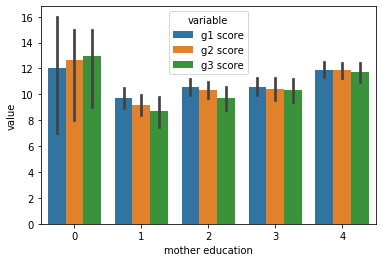

In [0]:
# melts the data to separate the grading period scores into separate observations
mother_education = df.melt(id_vars = ['mother education'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
sns.barplot(x = 'mother education', y = 'value', hue = 'variable' , data = mother_education)

The x-axis indicates the mother's education level. The numerics correspond to a education level: <br>
0 - none, <br>
1 - primary education (4th grade), <br>
2 – 5th to 9th grade, <br>
3 – secondary education, <br>
4 – higher education. <br>
The y-axis indicates the grade the student received with a grading scheme from 0 to 20. <br>
<br>
From the barplot, excluding the none barplot, there seems to be a positive trend correlated with the mother's education and student academic performance. Since it is unclear from the data if none indicates that the mother is not in the student's life or has no education, we will perform two analyses, one without the none parametric and one with. <br>
As seen in the following barplot, the same is true for the father's education level.

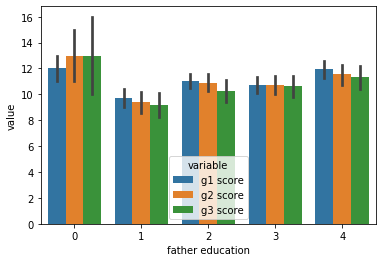

In [0]:
# melts the data to separate the grading period scores into separate observations
father_education = df.melt(id_vars = ['father education'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
sns.barplot(x = 'father education', y = 'value', hue = 'variable' , data = father_education)

The following barplot visualizes the differences in the average scores of students between two parent's education levels.

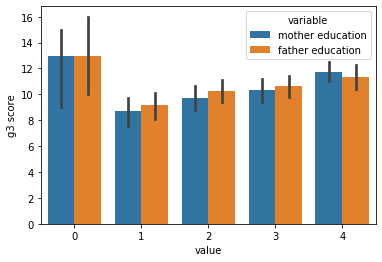

In [0]:
# melts the data to separate the variables, mother and father education, into separate observations
both = df.melt(id_vars = ['g3 score'], value_vars = ['mother education', 'father education'])
sns.barplot(x = 'value', y = 'g3 score', hue = 'variable' , data = both)

Visually, we notice that there is an upward trend of education level (excluding the education level of 0). Additionally, the effect of mother education level and father education level on student academic performance appears to be similar.

Since our variables transformed from their categorical value to a numeric rank, we want to utilize a statistical tool to determine if each rank were selected from the same populations, having the same distribution. The Wilcoxon rank-sum test (Mann Whitney U Test) is a useful test to determine this, but only between two samples. To speed things up, we will utilize Kruskal–Wallis H test which tests the null hypothesis that the population median of all of the groups are equal for ordinal data. <br>

#### mother education (including education level none)

In [0]:
# seperates each score by mother's education level and retrieves the array
mRank0 = mother_education[mother_education['mother education'] == 0]['value']
mRank1 = mother_education[mother_education['mother education'] == 1]['value']
mRank2 = mother_education[mother_education['mother education'] == 2]['value']
mRank3 = mother_education[mother_education['mother education'] == 3]['value']
mRank4 = mother_education[mother_education['mother education'] == 4]['value']
stats.kruskal(mRank0, mRank1, mRank2, mRank3, mRank4)

KruskalResult(statistic=70.6216159901289, pvalue=1.6778257263874645e-14)

#### mother education (excluding education level none)

In [0]:
stats.kruskal(mRank1, mRank2, mRank3, mRank4)

KruskalResult(statistic=68.5467268871623, pvalue=8.737825942552774e-15)

#### father education (including education level none)

In [0]:
# seperates each score by father's education level and retrieves the array
fRank0 = father_education[father_education['father education'] == 0]['value']
fRank1 = father_education[father_education['father education'] == 1]['value']
fRank2 = father_education[father_education['father education'] == 2]['value']
fRank3 = father_education[father_education['father education'] == 3]['value']
fRank4 = father_education[father_education['father education'] == 4]['value']
stats.kruskal(fRank0, fRank1, fRank2, fRank3, fRank4)

KruskalResult(statistic=55.33382718245614, pvalue=2.7656233508253057e-11)

#### father education (excluding education level none)

In [0]:
stats.kruskal(fRank1, fRank2, fRank3, fRank4)

KruskalResult(statistic=53.269650556501475, pvalue=1.6060424630288087e-11)

Since the p-value of mother education and father education (both including and excluding education level none) is less than 0.05, this means that the population median is not equal and we can reject the null hypothesis. This suggests that a parent's education level has an effect on the student's academic performance.

We want to further investigate if a student's academic performance is affected by a parent's education level by comparing the students that received educational support from family and those that were not able to receive educational support from family.

#### students with family education support

In [0]:
# retrieves only observations where students received family education support
data_fam_support = df[df['family education support'] == 'yes']

First, we will look at mother education.

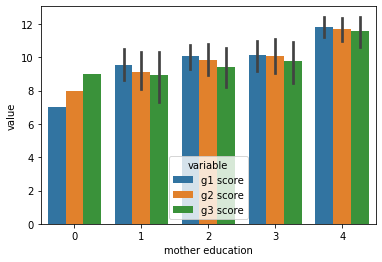

In [0]:
# melts the data to separate the grading period scores into separate observations
mother_education = data_fam_support.melt(id_vars = ['mother education'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
sns.barplot(x = 'mother education', y = 'value', hue = 'variable' , data = mother_education)

We will ignore mother education and father education of 0 because there is only one observation, and we have tested that even with the education level of 0 included that parent education level has an effect on academic performance.

In [0]:
# seperates each score by mother's education level and retrieves the array
mRank1 = mother_education[mother_education['mother education'] == 1]['value']
mRank2 = mother_education[mother_education['mother education'] == 2]['value']
mRank3 = mother_education[mother_education['mother education'] == 3]['value']
mRank4 = mother_education[mother_education['mother education'] == 4]['value']
stats.kruskal(mRank1, mRank2, mRank3, mRank4)

KruskalResult(statistic=50.88616612735676, pvalue=5.1730364848326246e-11)

Next, we will look at father education.

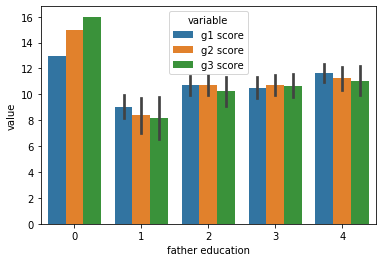

In [0]:
# melts the data to separate the grading period scores into separate observations
father_education = data_fam_support.melt(id_vars = ['father education'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
sns.barplot(x = 'father education', y = 'value', hue = 'variable' , data = father_education)

In [0]:
# seperates each score by father's education level and retrieves the array
fRank1 = father_education[father_education['father education'] == 1]['value']
fRank2 = father_education[father_education['father education'] == 2]['value']
fRank3 = father_education[father_education['father education'] == 3]['value']
fRank4 = father_education[father_education['father education'] == 4]['value']
stats.kruskal(fRank1, fRank2, fRank3, fRank4)

KruskalResult(statistic=46.09673608468335, pvalue=5.409142587460578e-10)

Since the p-value of mother education and father education
is less than 0.05, this means that the population median is not equal and we can reject the null hypothesis. This suggests that the result remains the same that parent education has an effect on a student's academic performance when the student is provided family educational support.


#### students without family education support

In [0]:
# retrieves only observations where students did not receive family education support
data_no_fam_support = df[df['family education support'] == 'no']

First, we will look at mother education.

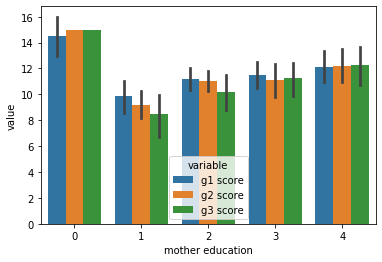

In [0]:
# melts the data to separate the grading period scores into separate observations
mother_education = data_no_fam_support.melt(id_vars = ['mother education'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
sns.barplot(x = 'mother education', y = 'value', hue = 'variable' , data = mother_education)

In [0]:
# seperates each score by mother's education level and retrieves the array
mRank1 = mother_education[mother_education['mother education'] == 1]['value']
mRank2 = mother_education[mother_education['mother education'] == 2]['value']
mRank3 = mother_education[mother_education['mother education'] == 3]['value']
mRank4 = mother_education[mother_education['mother education'] == 4]['value']
stats.kruskal(mRank1, mRank2, mRank3, mRank4)

KruskalResult(statistic=30.784117408193357, pvalue=9.438307698262965e-07)

Next, we will look at father education.

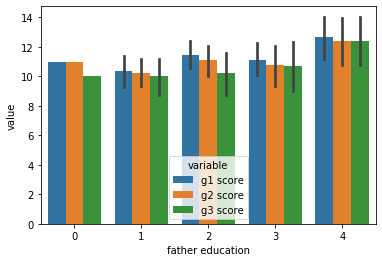

In [0]:
# melts the data to separate the grading period scores into separate observations
father_education = data_no_fam_support.melt(id_vars = ['father education'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
sns.barplot(x = 'father education', y = 'value', hue = 'variable' , data = father_education)

In [0]:
# seperates each score by father's education level and retrieves the array
fRank1 = father_education[father_education['father education'] == 1]['value']
fRank2 = father_education[father_education['father education'] == 2]['value']
fRank3 = father_education[father_education['father education'] == 3]['value']
fRank4 = father_education[father_education['father education'] == 4]['value']
stats.kruskal(fRank1, fRank2, fRank3, fRank4)

KruskalResult(statistic=19.618302461728387, pvalue=0.00020363859795606684)

Since the p-value of mother education and father education is less than 0.05, this means that the population median is not equal and we can reject the null hypothesis. This suggests that the result remains the same that parent education has an effect on the student's academic performance although a student did not receive educational support. This suggests that a parent's education still has an effect on a student's score although family did not directly provide educational support.

## Guardian

Since parent education level does effect a student's academnic performance, we want to examine whether a student's guardian would affect a student's performance.

In [0]:
mother_guardian = df[df['guardian'] == 'mother']
father_guardian = df[df['guardian'] == 'father']
other_guardian = df[df['guardian'] == 'other']

First, we will examine the mother and father education for students that listed mother as their guardian.

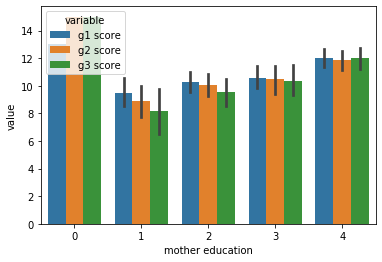

In [0]:
# melts the data to separate the grading period scores into separate observations
mother_education = mother_guardian.melt(id_vars = ['mother education'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
sns.barplot(x = 'mother education', y = 'value', hue = 'variable' , data = mother_education)

In [0]:
# seperates each score by mother's education level and retrieves the array
mRank1 = mother_education[mother_education['mother education'] == 1]['value']
mRank2 = mother_education[mother_education['mother education'] == 2]['value']
mRank3 = mother_education[mother_education['mother education'] == 3]['value']
mRank4 = mother_education[mother_education['mother education'] == 4]['value']
stats.kruskal(mRank1, mRank2, mRank3, mRank4)

KruskalResult(statistic=60.3271603713667, pvalue=5.004354288164904e-13)

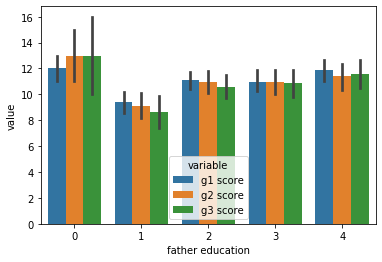

In [0]:
father_education = mother_guardian.melt(id_vars = ['father education'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
sns.barplot(x = 'father education', y = 'value', hue = 'variable' , data = father_education)

In [0]:
# seperates each score by father's education level and retrieves the array
fRank1 = father_education[father_education['father education'] == 1]['value']
fRank2 = father_education[father_education['father education'] == 2]['value']
fRank3 = father_education[father_education['father education'] == 3]['value']
fRank4 = father_education[father_education['father education'] == 4]['value']
stats.kruskal(fRank1, fRank2, fRank3, fRank4)

KruskalResult(statistic=48.93468938848338, pvalue=1.3468938267989546e-10)

Next, we will examine the mother and father eduation for students that listed father as their guardian.

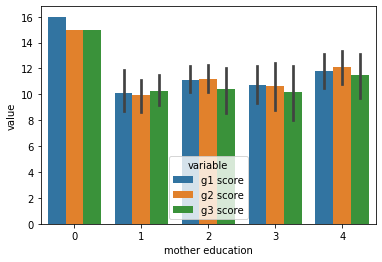

In [0]:
# melts the data to separate the grading period scores into separate observations
mother_education = father_guardian.melt(id_vars = ['mother education'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
sns.barplot(x = 'mother education', y = 'value', hue = 'variable' , data = mother_education)

In [0]:
# seperates each score by mother's education level and retrieves the array
mRank1 = mother_education[mother_education['mother education'] == 1]['value']
mRank2 = mother_education[mother_education['mother education'] == 2]['value']
mRank3 = mother_education[mother_education['mother education'] == 3]['value']
mRank4 = mother_education[mother_education['mother education'] == 4]['value']
stats.kruskal(mRank1, mRank2, mRank3, mRank4)

KruskalResult(statistic=10.19769426849239, pvalue=0.016958293722199647)

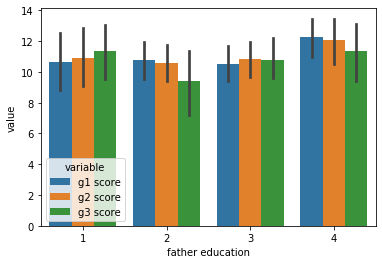

In [0]:
father_education = father_guardian.melt(id_vars = ['father education'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
sns.barplot(x = 'father education', y = 'value', hue = 'variable' , data = father_education)

In [0]:
# seperates each score by father's education level and retrieves the array
fRank1 = father_education[father_education['father education'] == 1]['value']
fRank2 = father_education[father_education['father education'] == 2]['value']
fRank3 = father_education[father_education['father education'] == 3]['value']
fRank4 = father_education[father_education['father education'] == 4]['value']
stats.kruskal(fRank1, fRank2, fRank3, fRank4)

KruskalResult(statistic=13.517268183890868, pvalue=0.0036416128427983695)

Since the p-value of mother education and father education is less than 0.05, this means that the population median is not equal and we can reject the null hypothesis. This suggests that the result remains the same that parent education has an effect on the student's academic performance although a student had a different guardian.

Finally, we will examine the mother and father eduation for students that listed other as their guardian.

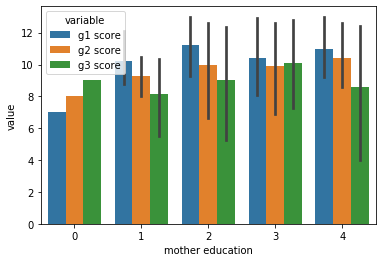

In [0]:
# melts the data to separate the grading period scores into separate observations
mother_education = other_guardian.melt(id_vars = ['mother education'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
sns.barplot(x = 'mother education', y = 'value', hue = 'variable' , data = mother_education)

In [0]:
# seperates each score by mother's education level and retrieve the array
mRank1 = mother_education[mother_education['mother education'] == 1]['value']
mRank2 = mother_education[mother_education['mother education'] == 2]['value']
mRank3 = mother_education[mother_education['mother education'] == 3]['value']
mRank4 = mother_education[mother_education['mother education'] == 4]['value']
stats.kruskal(mRank1, mRank2, mRank3, mRank4)

KruskalResult(statistic=2.9324019722643904, pvalue=0.40216531680878564)

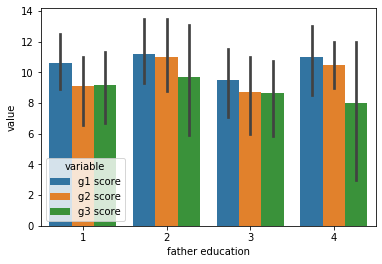

In [0]:
father_education = other_guardian.melt(id_vars = ['father education'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
sns.barplot(x = 'father education', y = 'value', hue = 'variable' , data = father_education)

In [0]:
# seperates each score by father's education level and retrieve the array
fRank1 = father_education[father_education['father education'] == 1]['value']
fRank2 = father_education[father_education['father education'] == 2]['value']
fRank3 = father_education[father_education['father education'] == 3]['value']
fRank4 = father_education[father_education['father education'] == 4]['value']
stats.kruskal(fRank1, fRank2, fRank3, fRank4)

Since the p-value of mother education and father education is greater than 0.05, this means that the population median is are equal and we can accept the null hypothesis. This indicates that mother and father education does not effect the academic performance of a student when the student lists other as their guardian.

When a student's guardian is neither mother nor father, parent education level does not have an effect on a student's academic performance.

Overall, our analysis indicates that both mother and father education effects students that listed either mother or father as their guardian. When the student lists "other" as their guardian, mother and father education does not have effect on a student's academic performance.

For future analysis, we would collect data on the education level of other to determine if guardian education level affects student academic performance to confirm the results that the student's guardian and their education level effects a student's performance.



## Travel Time

Student commute times were surveyed and grouped into ranks by researchers: rank 1 was 0-15 minutes, rank 2 was 15-30 minutes, and so on. 

The barplot below shows the distribution of commute time responses. 

####Commute Time Data

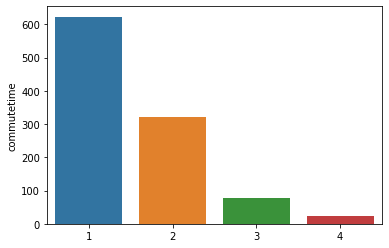

In [0]:
#df_merged
commutetime_counts = df_merged['commutetime'].value_counts()
sns.barplot(x = commutetime_counts.index, y = commutetime_counts)

####Commute Time Response Counts: Countplot

The barplot shows a skew towards higher travel times; most students have commutes between 0 and 30 minutes. This finding makes sense intuitively-- families may choose living places closer to school, or more likely, students are often registered into districts and only given choices of schools to attend that fit within a certain radius. Overall though, this suggests on the surface that there is likely nothing unusual about the average travel time of students in our dataset that should be taken note of in analysis.

The below barplot shows mean G1, G2, and G3 test scores in reading and math, for each category of commute time response. 


      commutetime  variable  value test_subject
0               2  g1 score      5         math
1               1  g1 score      5         math
2               1  g1 score      7         math
3               1  g1 score     15         math
4               1  g1 score      6         math
...           ...       ...    ...          ...
1942            1  g3 score     10      reading
1943            1  g3 score     16      reading
1944            2  g3 score      9      reading
1945            2  g3 score     10      reading
1946            3  g3 score     11      reading

[3132 rows x 4 columns]


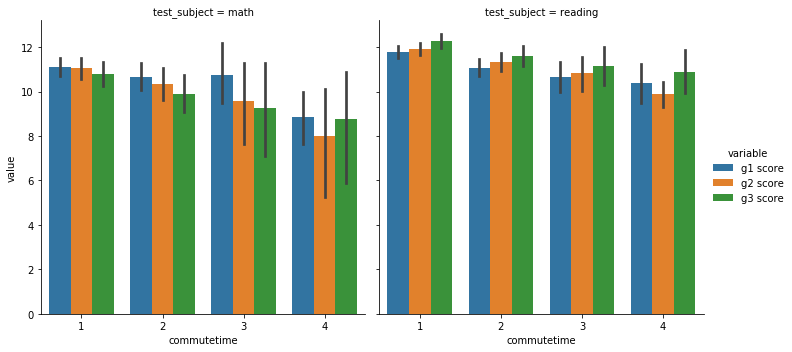

In [0]:
# grouped barplot
# Use melt function to reorder one variable and test scores as 3 columns with rows for each value
# To use, id_vars should be your desired x-axis variable, value_vars should be the desired y-axis variable(s)
commutetime_melt = df.melt(id_vars = ['commutetime'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
# adding a column to identify test subject; will be used later to separate catplot
commutetime_melt['test_subject'] = 'math'

# same as above, but with reading score data frame
commutetime_melt_por = df_por.melt(id_vars = ['commutetime'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
commutetime_melt_por['test_subject'] = 'reading'

# appending the dataframes to use with sns.catplot
commutetime_melt = commutetime_melt.append(commutetime_melt_por)
print(commutetime_melt)

# plotting using seaborn catplot function, using 'variable' column from melted DataFrame to create a grouped barplot
# result is two barplots side-by-side, separated by subject
commutetime_barplot = sns.catplot(x='commutetime', y='value',
                hue='variable', col='test_subject',
                data=commutetime_melt, kind="bar",);

####Test Scores by Commute Time Response: Barplot

The plot above shows data grouped by student-reported commute times to school, with each numerical increase representing a 30 minute increase in commute times. Their G1, G2, and cumulative G3 scores are plotted within the groups. 

There is a generally downward trend as student commute time increases, and this particularly impacts the G2 and G3 scores. Meanwhile, G1 scores are affected, but not as drastically.

Considering that G2 and G3 are later in the year, with G3 being a cumulative score, the data may indicate that the effect of high commute time on students' ability to study and prepare for tests, is impacted by commute time (i.e. time not able to be spent studying or learning), and this effect compounds as the year goes on. This may explain why the later test scores are impacted more severely.

Below is another attempt to visualize possible trends in the distribution, again separated by testing subject and with commute time responses as our categories.

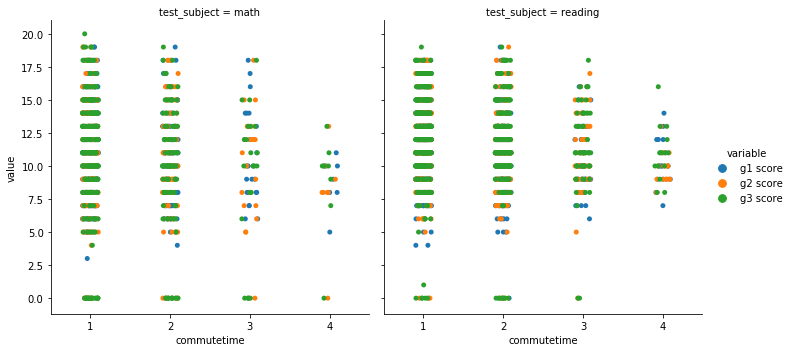

In [0]:
commutetime_stripplot = sns.catplot(x='commutetime', y='value',
                hue='variable', col='test_subject',
                data=commutetime_melt, kind="strip",);


####Testing Scores by Commute Time: Catplot

What can be seen from this plot is that within both testing subjects, students with lower commute times tend to have a more uniform distribution of scores across both low and high scores. However, as commute time increases, the distribution becomes less uniform and shifts towards lower scores.

Before peforming any kind of numerical testing, we will check if the distributions are normal, and if not, whether there is a difference in the means, using a Kruskal test. Otherwise, we will use a t-test.

####Statistical Testing

In [0]:
#obtaining all data points in each rank/category of travel time
commutetime_rank1 = commutetime_melt[commutetime_melt['commutetime'] == 1]['value']
commutetime_rank2 = commutetime_melt[commutetime_melt['commutetime'] == 2]['value']
commutetime_rank3 = commutetime_melt[commutetime_melt['commutetime'] == 3]['value']
commutetime_rank4 = commutetime_melt[commutetime_melt['commutetime'] == 4]['value']

#combining travel times higher than 15 minutes into a separate table for later usage
commutetime_ranks2plus = pd.concat([commutetime_rank2, commutetime_rank3, commutetime_rank4])

#Testing commute time distributions to see if they fit normal distributions. If they are, we will perform a t-test. Else we perform a Kruskal test.
#Both are to identify significant differences in the means.
if ((stats.normaltest(commutetime_rank1)[1]) and stats.normaltest(commutetime_rank2)[1] and stats.normaltest(commutetime_rank3)[1] and stats.normaltest(commutetime_rank4)[1] < 0.05):
  print("The commute time distributions are likely non-normal.")
  
  #Kruskal test to identify if there are significant differences in the means between all groups
  if (stats.kruskal(commutetime_rank1, commutetime_rank2, commutetime_rank3, commutetime_rank4)[1] < 0.05):
    print("Based on a Kruskal test, there IS a significant difference in the mean test scores of students in different commute time categories.")
  else: 
    print("Based on a Kruskal test, there is NO significant difference in the mean test scores of students across different commute time categories.")
  #Kruskal test to determine if there are significant differences in the means between only students with < 15 min commute time, compared to all others
  if (stats.kruskal(commutetime_rank1, commutetime_ranks2plus)[1] < 0.05):
    print("Based on a Kruskal test, there IS a significant difference in the mean test scores of students with commute times under 15 minutes, and those with higher commute times.")
  else:
    print("Based on a Kruskal test, there is NO a significant difference in the mean test scores of students with commute times under 15 minutes, and those with higher commute times.")

#If distributions are normal, do t-test instead comparing students with < 15 min commute and all others
else: 
  print("Some of the commute time distributions are normally distributed.")
  commute_t_stat, commute_p_val = stats.ttest_ind(commutetime_rank1, commutetime_ranks2plus , equal_var=False)
  if commute_p_val < 0.05:
    print("Based on a t-test, there IS a significant difference in the mean test scores of students with commute times under 15 minutes, and those with higher commute times.")
  else:
    print("Based on a t-test, there is NO a significant difference in the mean test scores of students with commute times under 15 minutes, and those with higher commute times.")




The commute time distributions are likely non-normal.
Based on a Kruskal test, there IS a significant difference in the mean test scores of students in different commute time categories.
Based on a Kruskal test, there IS a significant difference in the mean test scores of students with commute times under 15 minutes, and those with higher commute times.


Analyzing the data shows a non-normal distribution of travel times. Based on this, we choose to perform a Kruskal-Wallis test to determine if the different groups of students (by travel time) have significant differences in their mean test scores, across both subjects. 

Both tests return p-values below 0.05, suggesting that students with lower commute times have a significant difference in their test scores. From the barplots made earlier, it is clear this is a positve difference in favor of those with lower commute times.

####Conclusion
Overall, our analysis indicates that students with shorter commute times to school score meaningfully higher on the standardized tests conducted. This suggests commute times does affect students' education quality and learning in to measurable effect. 

## Family Relation Quality

Student relation quality with their family was surveyed and grouped into ranks by researchers: ranging from 1 as "very poor", 3 as "average", and 5 as "very good". 

The barplot below shows the distribution of family relation quality responses. 

####Family Relation Quality Data

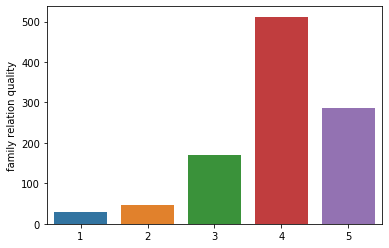

In [0]:
family_relation_counts = df_merged['family relation quality'].value_counts()
sns.barplot(x = family_relation_counts.index, y = family_relation_counts)

####Family Relation Quality Response Counts: Countplot

The barplot shows a skew towards lower quality of family relations. Most students self-report better quality of home life and interactions with family; while a smaller, but significant proportion report having difficulties in their family and overall a lower quality of time and interaction with them. 

No one group of response comprises an overwhelming majority of the responses, nor does any category have very few or no responses. 

The below barplot shows mean G1, G2, and G3 test scores in reading and math, for each category of family relation quality. 


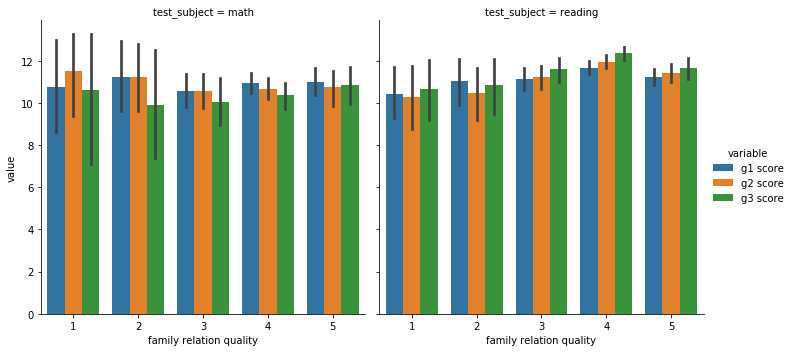

In [0]:
# grouped barplot
# Use melt function to reorder one variable and test scores as 3 columns with rows for each value
# To use, id_vars should be your desired x-axis variable, value_vars should be the desired y-axis variable(s)
family_relation_math_melt = df.melt(id_vars = ['family relation quality'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
# adding a column to identify test subject; will be used later to separate catplot
family_relation_math_melt['test_subject'] = 'math'

# same as above, but with reading score data frame
family_relation_por_melt = df_por.melt(id_vars = ['family relation quality'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
family_relation_por_melt['test_subject'] = 'reading'

# appending the dataframes to use with sns.catplot
family_relation_merged_melt = family_relation_math_melt.append(family_relation_por_melt)

# plotting using seaborn catplot function, using 'variable' column from melted DataFrame to create a grouped barplot
# result is two barplots side-by-side, separated by subject
family_relation_barplot = sns.catplot(x='family relation quality', y='value',
                hue='variable', col='test_subject',
                data=family_relation_merged_melt, kind="bar",);

####Testing Scores by Family Relation Quality: Barplot

The plot above shows data grouped by student-reported family relationship quality, from 1 to 5, with each numerical increase expressing a change from "very bad" to "very good", increasing. Their G1, G2, and cumulative G3 scores for math and reading are plotted within the groups. 

With math scores, there is a slight downward trend as family relationship quality increases, and this particularly impacts the G2 and G3 scores. Meanwhile, G1 scores are affected, but not as drastically.

However, reading scores show a slight positive trend with increasing family relation quality. One possible explanation is that parents with good relation with their children and vice versa are more likely to engage in activities such as reading, etc with their child, which may help in subjects such as reading.



Below is another attempt to visualize possible trends in the distribution, again separated by testing subject and with family relation quality as the categories.

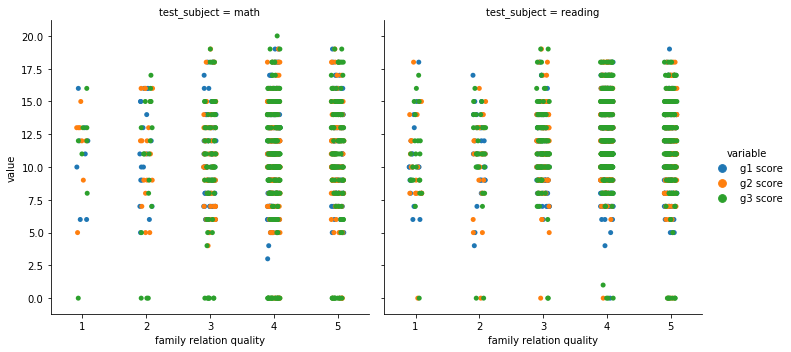

In [0]:
familyrelation_stripplot = sns.catplot(x='family relation quality', y='value',
                hue='variable', col='test_subject',
                data=family_relation_merged_melt, kind="strip",);


####Testing Scores by Family Relation Quality: Catplot

With higher self-reported family relation quality tend to have a more uniform distribution of scores across both low and high scores. However, as the family relation quality decreases, the distribution becomes less uniformly distributed, with with less higher scores. However, this could also be attributed to there being less data points with low family relation quality. Were a larger sample size conducted, it is possible to see similar distributions.

Before peforming any kind of numerical testing, we will check if the distributions are normal, and if not, whether there is a difference in the means, using a Kruskal test. Otherwise, we will use a t-test.

####Statistical Testing

In [0]:
#obtaining all data points in each rank/category of family relation quality
familyrelation_merged_rank1 = family_relation_merged_melt[family_relation_merged_melt['family relation quality'] == 1]['value']
familyrelation_merged_rank2 = family_relation_merged_melt[family_relation_merged_melt['family relation quality'] == 2]['value']
familyrelation_merged_rank3 = family_relation_merged_melt[family_relation_merged_melt['family relation quality'] == 3]['value']
familyrelation_merged_rank4 = family_relation_merged_melt[family_relation_merged_melt['family relation quality'] == 4]['value']
familyrelation_merged_rank5 = family_relation_merged_melt[family_relation_merged_melt['family relation quality'] == 5]['value']

familyrelation_math_rank1 = family_relation_math_melt[family_relation_math_melt['family relation quality'] == 1]['value']
familyrelation_math_rank2 = family_relation_math_melt[family_relation_math_melt['family relation quality'] == 2]['value']
familyrelation_math_rank3 = family_relation_math_melt[family_relation_math_melt['family relation quality'] == 3]['value']
familyrelation_math_rank4 = family_relation_math_melt[family_relation_math_melt['family relation quality'] == 4]['value']
familyrelation_math_rank5 = family_relation_math_melt[family_relation_math_melt['family relation quality'] == 5]['value']

familyrelation_por_rank1 = family_relation_por_melt[family_relation_por_melt['family relation quality'] == 1]['value']
familyrelation_por_rank2 = family_relation_por_melt[family_relation_por_melt['family relation quality'] == 2]['value']
familyrelation_por_rank3 = family_relation_por_melt[family_relation_por_melt['family relation quality'] == 3]['value']
familyrelation_por_rank4 = family_relation_por_melt[family_relation_por_melt['family relation quality'] == 4]['value']
familyrelation_por_rank5 = family_relation_por_melt[family_relation_por_melt['family relation quality'] == 5]['value']

#Combined Scores
#combining family relation quality responses 3 or higher into a separate table for later usage
familyrelation_merged_ranks3plus = pd.concat([familyrelation_merged_rank3, familyrelation_merged_rank4, familyrelation_merged_rank5])

#Testing family relation quality distributions to see if they fit normal distributions. If they are, we will perform a t-test. Else we perform a Kruskal test.
#Both are to identify significant differences in the means.
if ((stats.normaltest(familyrelation_merged_rank1)[1]) and stats.normaltest(familyrelation_merged_rank2)[1] and stats.normaltest(familyrelation_merged_rank3)[1] and stats.normaltest(familyrelation_merged_rank4)[1] and stats.normaltest(familyrelation_merged_rank5)[1] < 0.05):
  print("The family relation quality distributions (math AND reading) are likely non-normal.")
  
  #Kruskal test to identify if there are significant differences in the means between all groups
  if (stats.kruskal(familyrelation_merged_rank1, familyrelation_merged_rank2, familyrelation_merged_rank3, familyrelation_merged_rank4, familyrelation_merged_rank5)[1] < 0.05):
    print("Based on a Kruskal test, there IS a significant difference in the combined mean test scores of students in different family relation quality categories.")
  else: 
    print("Based on a Kruskal test, there is NO significant difference in the combined mean test scores of students across different family relation quality categories.")
  #Kruskal test to determine if there are significant differences in the means between only students responding 3 or higher on family relation quality, compared to all others
  if (stats.kruskal(familyrelation_merged_rank1, familyrelation_merged_ranks3plus)[1] < 0.05):
    print("Based on a Kruskal test, there IS a significant difference in the combined mean test scores of students reporting better family relations, and those who don't.\n")
  else:
    print("Based on a Kruskal test, there is NO a significant difference in the combined mean test scores of students reporting better family relations, and those who don't.\n")

#If distributions are normal, do t-test instead comparing students reporting 3 or higher on family relation quality, compared to all others
else: 
  print("Some of the family relation quality distributions (math AND reading) are normally distributed.")
  familyrelation_merged_t_stat, familyrelation_merged_p_val = stats.ttest_ind(familyrelation_merged_rank1, familyrelation_merged_ranks3plus , equal_var=False)
  if familyrelation_merged_p_val < 0.05:
    print("Based on a t-test, there IS a significant difference in the combined mean test scores of students reporting better family relations, and those who don't.\n")
  else:
    print("Based on a t-test, there is NO a significant difference in the combined mean test scores of students reporting better family relations, and those who don't.\n")

#Math Scores
#combining family relation quality responses 3 or higher into a separate table for later usage
familyrelation_math_ranks3plus = pd.concat([familyrelation_math_rank3, familyrelation_math_rank4, familyrelation_math_rank5])

#Testing family relation quality distributions to see if they fit normal distributions. If they are, we will perform a t-test. Else we perform a Kruskal test.
#Both are to identify significant differences in the means.
if ((stats.normaltest(familyrelation_math_rank1)[1]) and stats.normaltest(familyrelation_math_rank2)[1] and stats.normaltest(familyrelation_math_rank3)[1] and stats.normaltest(familyrelation_math_rank4)[1] and stats.normaltest(familyrelation_math_rank5)[1] < 0.05):
  print("The family relation quality distributions (math only) are likely non-normal.")
  
  #Kruskal test to identify if there are significant differences in the means between all groups
  if (stats.kruskal(familyrelation_math_rank1, familyrelation_math_rank2, familyrelation_math_rank3, familyrelation_math_rank4, familyrelation_math_rank5)[1] < 0.05):
    print("Based on a Kruskal test, there IS a significant difference in the mean math test scores of students in different family relation quality categories.")
  else: 
    print("Based on a Kruskal test, there is NO significant difference in the mean math test scores of students across different family relation quality categories.")
  #Kruskal test to determine if there are significant differences in the means between only students responding 3 or higher on family relation quality, compared to all others
  if (stats.kruskal(familyrelation_math_rank1, familyrelation_math_ranks3plus)[1] < 0.05):
    print("Based on a Kruskal test, there IS a significant difference in the mean math test scores of students reporting better family relations, and those who don't.\n")
  else:
    print("Based on a Kruskal test, there is NO a significant difference in the mean math test scores of students reporting better family relations, and those who don't.\n")

#If distributions are normal, do t-test instead comparing students reporting 3 or higher on family relation quality, compared to all others
else: 
  print("Some of the family relation quality distributions (math only) are normally distributed.")
  familyrelation_math_t_stat, familyrelation_math_p_val = stats.ttest_ind(familyrelation_math_rank1, familyrelation_math_ranks3plus , equal_var=False)
  if familyrelation_math_p_val < 0.05:
    print("Based on a t-test, there IS a significant difference in the mean math test scores of students reporting better family relations, and those who don't.\n")
  else:
    print("Based on a t-test, there is NO a significant difference in the mean math test scores of students reporting better family relations, and those who don't.\n")

#Reading Scores
#combining family relation quality responses 3 or higher into a separate table for later usage
familyrelation_por_ranks3plus = pd.concat([familyrelation_por_rank3, familyrelation_por_rank4, familyrelation_por_rank5])

#Testing family relation quality distributions to see if they fit normal distributions. If they are, we will perform a t-test. Else we perform a Kruskal test.
#Both are to identify significant differences in the means.
if ((stats.normaltest(familyrelation_por_rank1)[1]) and stats.normaltest(familyrelation_por_rank2)[1] and stats.normaltest(familyrelation_por_rank3)[1] and stats.normaltest(familyrelation_por_rank4)[1] and stats.normaltest(familyrelation_por_rank5)[1] < 0.05):
  print("The family relation quality distributions (reading only) are likely non-normal.")
  
  #Kruskal test to identify if there are significant differences in the means between all groups
  if (stats.kruskal(familyrelation_por_rank1, familyrelation_por_rank2, familyrelation_por_rank3, familyrelation_por_rank4, familyrelation_por_rank5)[1] < 0.05):
    print("Based on a Kruskal test, there IS a significant difference in the mean reading test scores of students in different family relation quality categories.")
  else: 
    print("Based on a Kruskal test, there is NO significant difference in the mean reading test scores of students across different family relation quality categories.")
  #Kruskal test to determine if there are significant differences in the means between only students responding 3 or higher on family relation quality, compared to all others
  if (stats.kruskal(familyrelation_por_rank1, familyrelation_por_ranks3plus)[1] < 0.05):
    print("Based on a Kruskal test, there IS a significant difference in the mean reading test scores of students reporting better family relations, and those who don't.\n")
  else:
    print("Based on a Kruskal test, there is NO a significant difference in the mean reading test scores of students reporting better family relations, and those who don'tn")

#If distributions are normal, do t-test instead comparing students reporting 3 or higher on family relation quality, compared to all others
else: 
  print("Some of the family relation quality distributions (reading only) are normally distributed.")
  familyrelation_por_t_stat, familyrelation_por_p_val = stats.ttest_ind(familyrelation_por_rank1, familyrelation_por_ranks3plus , equal_var=False)
  if familyrelation_por_p_val < 0.05:
    print("Based on a t-test, there IS a significant difference in the mean test scores of students reporting better family relations, and those who don't.\n")
  else:
    print("Based on a t-test, there is NO a significant difference in the mean test scores of students reporting better family relations, and those who don'.\n")


The family relation quality distributions (math AND reading) are likely non-normal.
Based on a Kruskal test, there IS a significant difference in the combined mean test scores of students in different family relation quality categories.
Based on a Kruskal test, there IS a significant difference in the combined mean test scores of students reporting better family relations, and those who don't.

The family relation quality distributions (math only) are likely non-normal.
Based on a Kruskal test, there is NO significant difference in the mean math test scores of students across different family relation quality categories.
Based on a Kruskal test, there is NO a significant difference in the mean math test scores of students reporting better family relations, and those who don't.

The family relation quality distributions (reading only) are likely non-normal.
Based on a Kruskal test, there IS a significant difference in the mean reading test scores of students in different family relation

Analyzing the data shows the distribution of family relation quality responses is likely non-normal. Based on this, we choose to perform a Kruskal-Wallis test to determine if the different groups of students (grouped by family relation quality responses) have significant differences in their mean test scores, across both subjects. 

Both tests return p-values below 0.05, suggesting that students with lower family relation quality have a significant difference in their test scores. This conclusion is the same for when math and reading scores are combined, or analyzed separately. However, the barplots suggest that reading scores are more impacted by higher family relation quality than math scores are. 

####Conclusion
Overall, our analysis indicates that students who report higher family relation quality scored meaningfully higher on the standardized tests conducted. This suggests family relation quality does affect students' education quality and learning in to measurable effect, particularly on reading comprehension. However, the family quality scores are self-reported and more subjective than commute time and travel time surveys, which group students into predefined, specific bins. This could lead to biased results, which we should take into account.



## Study Time


Following student family relationship quality, we will look at how the length of study time influences a student's academic performance. First, we will represent the data using a bargraph to see the distribution of student responses.


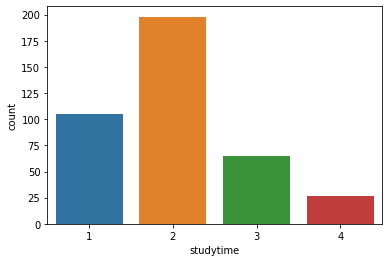

In [0]:
sns.countplot(x='studytime', data=df)


As shown in the figure above, the students responded with numbers on a scale of 1-4, where a response of 1 means the student studied for less than 2 hours, 2 translates to 5 hours, 3 to 5-10 hours, and 4 to more than 10 hours. The data in the barplot shows a distribution in which most responses are skewed towards a 2. 


Next, we will look at the distribution of responses when split up and compared against the G1, G2, and G3 scores. This will allow for greater analysis and insight into whether there may be a correlation between study time and academic achievement.

      studytime  variable  value
0             2  g1 score      5
1             2  g1 score      5
2             2  g1 score      7
3             3  g1 score     15
4             2  g1 score      6
...         ...       ...    ...
1180          2  g3 score      9
1181          1  g3 score     16
1182          1  g3 score      7
1183          1  g3 score     10
1184          1  g3 score      9

[1185 rows x 3 columns]


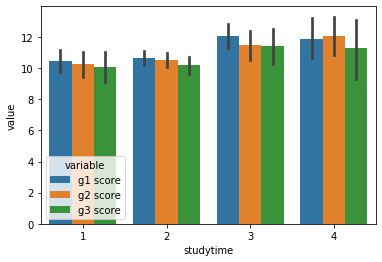

In [0]:
studytime_data = df.melt(id_vars = ['studytime'], value_vars = ['g1 score', 'g2 score', 'g3 score'])
print(studytime_data)

sns.barplot(x = 'studytime', y='value', hue = 'variable', data = studytime_data)

The figure above shows the test score values of G1, G2, G3 when study time is used as the independent variable in the barplot. When looking at the data, there is a slight positive correlation in academic achievement with an increased amount of study time. For example, the values of all G1, G2, and G3 all increase when looking at a response of 2 versus a response of 3.

G1 seems to show the biggest increase among all the test scores when keeping study time into account, following that G2, and then G3. With a greater amount of study time, it makes sense to see that there would be a trend seen with academic achievement as students would be better prepared to tackle course material, and in turn get better grades.

However, this does not particularly show a strong trend, so we will look into this data more deeply by filtering out the school to MS (the dataset contains the schools GP and MS), and finding a positive correlation between study time and test scores through the scatterplots.

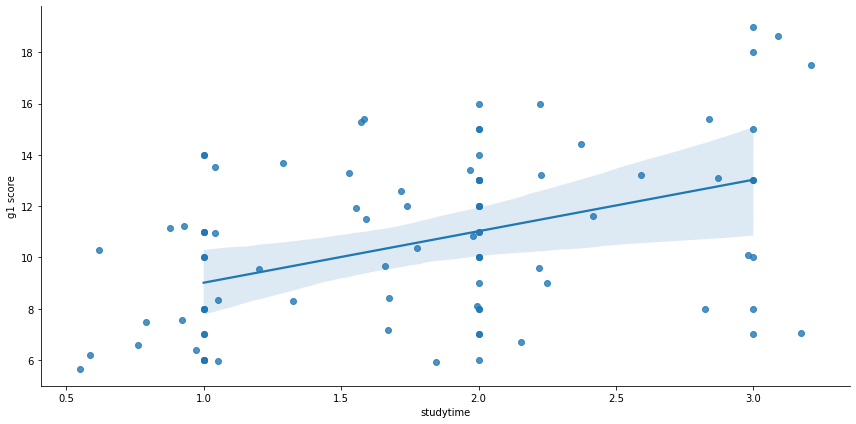

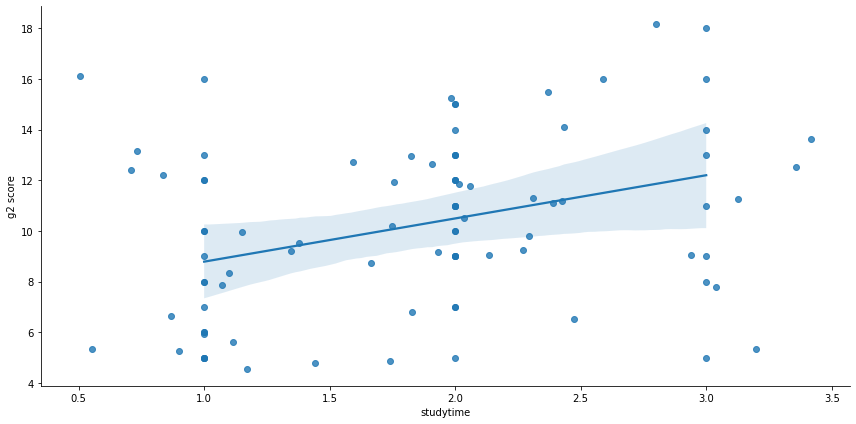

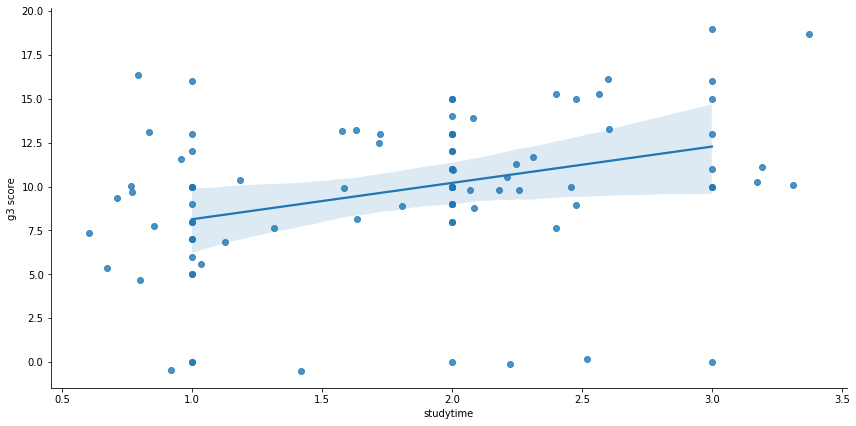

In [0]:
#Create a dataframe that only contains responses with school as MS
df_school_MS = df.loc[df['school'] == 'MS']

#Create G1 scatterplot and trendline
sns.lmplot(x='studytime', y='g1 score', data=df_school_MS, 
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);
sns.regplot(x="studytime", y="g1 score", data=df_school_MS)

#Create G1 scatterplot and trendline
sns.lmplot(x='studytime', y='g2 score', data=df_school_MS, 
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);
sns.regplot(x="studytime", y="g2 score", data=df_school_MS)

#Create G1 scatterplot and trendline
sns.lmplot(x='studytime', y='g3 score', data=df_school_MS, 
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);
sns.regplot(x="studytime", y="g3 score", data=df_school_MS)

In the scatterplots above, all G1, G2, and G3 scores show a small positive correlation with study time. 

To begin further analysis of the data, we must look to see if the data is normally distributed in order to determine what test we should use. In addition, for our null hypothesis, we will conclude that study time does not have an effect on student achievement, while for our alternate hypothesis, we will conclude that study time does have an effect on student achievement.

In [0]:
#Isolate each ranking value of studytime
studytime_1 = studytime_data.loc[studytime_data['studytime'] == 1]['value']
studytime_2 = studytime_data.loc[studytime_data['studytime'] == 2]['value']
studytime_3 = studytime_data.loc[studytime_data['studytime'] == 3]['value']
studytime_4 = studytime_data.loc[studytime_data['studytime'] == 4]['value']

#Print p-values of each ranking
print("The p-values for each ranking from 1-4 is as follows " + str(stats.normaltest(studytime_1)[1]) +", " + str(stats.normaltest(studytime_2)[1])+
      ", "+ str(stats.normaltest(studytime_3)[1]) + ", " + str(stats.normaltest(studytime_4)[1]))

The p-values for each ranking from 1-4 is as follows 0.021380720206122233, 4.699009508078935e-07, 5.526071063185109e-08, 0.05242228033902213


Because not all of the p-values are less than .05, they are not normally distributed and thus, we must use a Kruskal test to check for significance. 

In [0]:
if stats.kruskal(studytime_1, studytime_2, studytime_3, studytime_4)[1] < 0.05:
  print ("There is a significant difference between the medians of each rank, so we can reject the null hypothesis and say that study time influences student achievement")
else:
  print ("There is not a significant difference between the medians of each rank, so we accept the null hypothesis and say that study time does not influence student achievement")

There is a significant difference between the medians of each rank, so we can reject the null hypothesis and say that study time influences student achievement


Overall, with the overall trends in the barplot and scatterplots, as well as analysis of the non-normal distributed ranking data through the Kruskal test, we can conclude that there is a correlation between study time and student performance.


## Absences

There are many research studies that indicate missing school hurts academic performance (5). First we show an exploratory graph to see the data we have. First, we'll show the whole data, then separate it by schools. It is not clearly stated if the absences recorded is the cumulative amount of absences for each student. In the case that it is the cumulative amount of absences, we will use the final grades, g3 scores, to calculate the effect of absences on grades. According to the Department of Education, Chronic Absenteeism does not differ significantly by gender, but the likelihood of chronic absenteeism increases as students progess through high school.

Null Hypothesis: Absences does not affect the final grade. 

Alternative Hypothesis: Absences affects the final grade.

First we will get the columns that we want to analyze.

In [0]:
df_absences_mat = df[['school', 'g3 score', 'absences']]
df_absences_por = df_por[['school', 'g3 score', 'absences']]

Next we will visualize the data to see what kind of regression we can do.

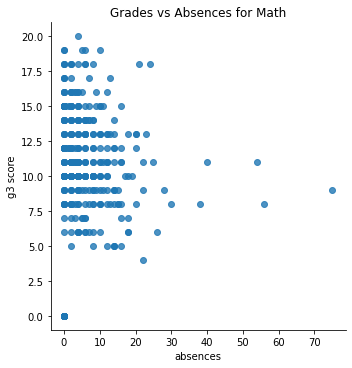

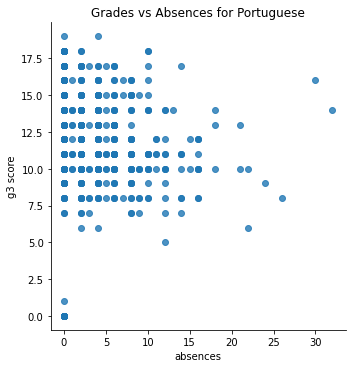

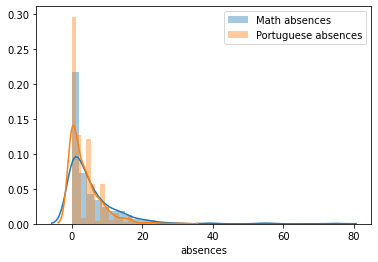

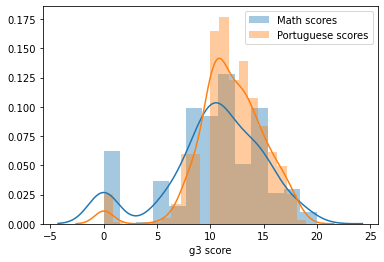

In [0]:
sns.lmplot('absences', 'g3 score', data=df_absences_mat, fit_reg=False)
plt.title("Grades vs Absences for Math")
plt.show()
sns.lmplot('absences', 'g3 score', data=df_absences_por, fit_reg=False)
plt.title("Grades vs Absences for Portuguese")
plt.show()

sns.distplot(df_absences_mat['absences'], hist=True, label="Math absences")
sns.distplot(df_absences_por['absences'], hist=True, label="Portuguese absences")
plt.legend()
plt.show()

sns.distplot(df_absences_mat['g3 score'], hist=True, label="Math scores")
sns.distplot(df_absences_por['g3 score'], hist=True, label="Portuguese scores")
plt.legend()
plt.show()


From the the scatter plots, we can see some sort of downwards trend and in combination with the histograms we can see there are a few outliers which will be removed them from the dataset. Specifically the values where there were 0 absences, but a 0 grade was received and the data point where there were 0 absences but a grade of 1 was received. We will also remove the cases where there were more than 30 absences as well. 
We can see that the g3 scores are normally distributed, but the absences are not. However, we can still see that there is some sort of downwards trend that affects the final grade.


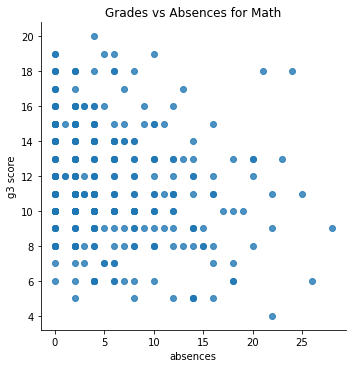

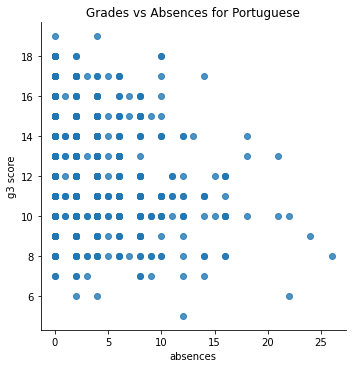

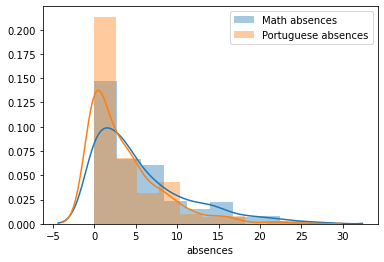

In [0]:
# get the columns we want to remove values from
cols_of_interest = ['absences', 'g3 score']

# remove rows that have absences and g3 score equal to 0
df_absences_mat = df_absences_mat.loc[(df_absences_mat[cols_of_interest] != 0).any(axis=1)]
df_absences_por = df_absences_por.loc[(df_absences_por[cols_of_interest] != 0).any(axis=1)]

# remove rows where absences exceed 30
df_absences_mat = df_absences_mat[df_absences_mat.absences < 30]
df_absences_por = df_absences_por[df_absences_por.absences < 30]

# remove rows where g3 score was 1 or less
df_absences_por = df_absences_por[df_absences_por['g3 score'] > 1]


# plot new graph
sns.lmplot('absences', 'g3 score', data=df_absences_mat, fit_reg=False)
plt.title("Grades vs Absences for Math")
plt.show()

# plot new graph
sns.lmplot('absences', 'g3 score', data=df_absences_por, fit_reg=False)
plt.title("Grades vs Absences for Portuguese")
plt.show()

# historgram for absences
sns.distplot(df_absences_mat['absences'], hist=True, label="Math absences", 
              bins=int(30/3))
sns.distplot(df_absences_por['absences'], hist=True, label="Portuguese absences",
              bins=int(30/3))
plt.legend()
plt.show()

We will will not transform the indepentdent variable and go forward with a linear regression test.

In [0]:
df_absences_mat.rename(columns={'g3 score': 'g3_score'}, inplace=True)
df_absences_por.rename(columns={'g3 score': 'g3_score'}, inplace=True)


outcome_mat, predictors_mat = patsy.dmatrices("g3_score ~ absences", df_absences_mat)
model_mat = sm.OLS(outcome_mat, predictors_mat)

outcome_por, predictors_por = patsy.dmatrices("g3_score ~ absences", df_absences_por)
model_por = sm.OLS(outcome_por, predictors_por)

res_mat = model_mat.fit()
res_por = model_por.fit()

print(res_mat.summary())
print(res_por.summary())

                            OLS Regression Results                            
Dep. Variable:               g3_score   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     17.22
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           4.19e-05
Time:                        00:47:15   Log-Likelihood:                -901.25
No. Observations:                 351   AIC:                             1807.
Df Residuals:                     349   BIC:                             1814.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2476      0.236     51.921      0.0

# Conclusion

From the test, we get an R-squared value of 0.047 for the math class and an R-squared value of 0,056 for the Portuguese class. From this, we can conclude that the line does not represent any of the data and thus, we cannot conlude that absences affect the final grade with this data. However, there may be confounding variables as students with 0 absences can receive a passing grade or a failing grade. There are more variables that can affect a student's grade. 

**We cannot analyze the effect of absences on student's final grades**

# Ethics & Privacy

The data used involves student information that is for public use on Kaggle, as they provide datasets that are public domain. Since the dataset has information from real students, it is important to make sure that there are proper measures to address the privacy concerns that may arise. The dataset used is fully anonymized and has no information that is able to be used to personally identify an individual. However, there are variables such as a student’s school, age, parents’ occupation, and family size that may allow an individual to be identified, but it would be hard to exactly pinpoint a particular student with only that information at hand. As for biases in our dataset, the data come from two schools in Portugal, and it is impossible to exactly know whether or not there are any other influencing factors due to the data not providing any information on each students’ geographical data. In addition, a potential issue that may arise with our data is that, while the information is fully anonymous, the data may be used to garner a negative perception of the certain school being analyzed, as there is information on income, student alcohol consumption, and amount of student failures. To handle the issue that we identified, we analyze the data in an objective manner, and we do not link a particular school as to having a particular trait since that isn’t the intent of the study. In our analysis we only take variables and see how they influence student performance across both schools and make conclusions from that information.

# Conclusion & Discussion

To answer our original research question: “What are the greatest indicators of a student's academic success?”, we analyzed several variables provided by our dataset. The results of comparing these variables with test scores are summarized below. 
 
As far as student alcohol consumption is concerned, there appeared to be a significant difference when comparing little to no alcohol consumed during the week to more than a little alcohol consumed during the week. Using one sided t-test to compare these two groups, it was found that more alcohol consumption resulted in a lower mean test score.

Regarding parent education, we determined family education to have an effect on a student’s academic performance. Since we worked with categorical variables, it cannot be concluded which parent had a higher effect on a student’s performance. We found that parent educational level affects both students who received family educational support and students that did not receive family educational support. This shows that parent education levels impact a student’s performance in school regardless whether or not students receive educational support from their family. 
Investigating further, when the guardian is either the mother or father, both the mother education level and father education level has an effect on academic performance. However, a parent’s education level does not affect a student’s academic performance when their guardian is listed as other.

Increased or decreased commute time to school is another variable we sought to study. Intuitively, increased travel time would leave students less time for studying and other activities, and decrease educational performance, and vice versa. The data analysis we performed suggested such a result. Even when comparing groups of students with a less than 15 minute commute time with all others, we observed a difference. This suggests that even small increases in commute time have significant effects on educational performance.

Quality of home and family life is another factor that, intuitively, may have an effect on students’ education. As this was also surveyed in our dataset, we chose to analyze this variable. Students who have reported lower family relation quality showed a significant difference in both their math and their reading scores. 

When analyzing study time and its effect on students’ academic success, there was shown to be a correlation between the two variables as we rejected the null hypothesis. Because not all of the rankings were normally distributed, we performed a Kruskal test on each of the rankings, and it resulted in a p-value that was less than 0.05, showing that the medians of each ranking had a significant difference and that study time does have an affect on performance. 

Despite studies showing that absences do in fact affect a student's grade, with the data we have, we cannot conclude that absences affect a student's grade. When comparing the final grade to the number of absences for each student, there seemed to be a downwards trend as the absences increased. Whole values were given instead of ranked values, so we performed a linear regression test with an alpha level of 0.05. However, the R-squared came out to be 0.047 for the math class and 0.056 for the Portuguese class, meaning the linear regression does not accurately fit the data, suggesting this is not the correct test for this data. So we cannot conclude absences affect the final grade. 


# Team Contributions

Jacob - Student Alcohol Consumption

Trinity - Family Education and Guardianship

Ryan - Travel Time and Family Relationship

Bryan - Study Time

Alyssa - Absences
